In [250]:
# importing libraries
import numpy as np
import scipy
from scipy import interpolate
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline
import IPython.display 
import librosa
import librosa.display
import essentia
import essentia.standard as es
np.set_printoptions(threshold='nan')

In [251]:
# initialising STFT params
sr = 44100
N = 2**15 #FFT size
M = N     #window size
H = M/4  #hop size
W = np.hanning(M)

tracks = ['human_mix','pedro_mix','myalgo_mix']
track = [[],[],[]]
m1 = [[],[],[]]
m2 = [[],[],[]]
a1 = [[],[],[]]
a2 = [[],[],[]]

n = N/2 + 1
bins = np.arange(0,n)   

b_20,b_20k = int(20 * float(N)/sr), int(20000 * float(N)/sr)
bins1 = bins[b_20:b_20k]
# s = m1[0][b_20:b_20k,0]

freq = np.linspace(20,20000,np.size(bins1))
xm = 2595 * np.log10(1 + (freq)/700)

for i in range(0,len(tracks)):
    
    track[i],sr = librosa.load(tracks[i]+'.wav', sr = sr, mono = False)
    stft1 = librosa.stft(y = track[i][0], n_fft = N,win_length=M, hop_length=H, window = 'hann')  
    stft2 = librosa.stft(y = track[i][1], n_fft = N,win_length=M, hop_length=H, window = 'hann') 
    mL,p1 = librosa.magphase(stft1)
    mR,p2 = librosa.magphase(stft2)
    m1[i],m2[i] = mL/np.max(mL),mR/np.max(mR)
    
    aL, aR = np.average(m1[i],axis=1),np.average(m2[i],axis=1) 
    aL = aL[b_20:b_20k]
    aR = aR[b_20:b_20k]
    a1[i],a2[i] = aL/np.max(aL), aR/np.max(aR)  
    


---------------------------------------------------------------

Overall similarity index =  0.9860596


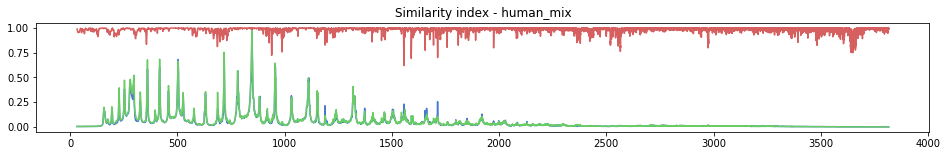


---------------------------------------------------------------

Overall similarity index =  0.942668


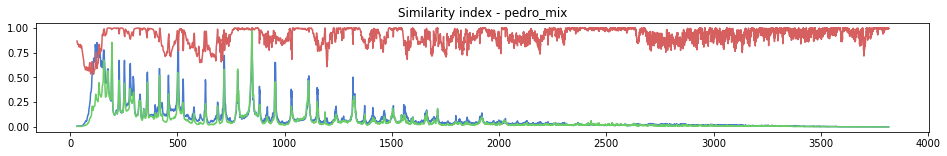


---------------------------------------------------------------

Overall similarity index =  0.7039365


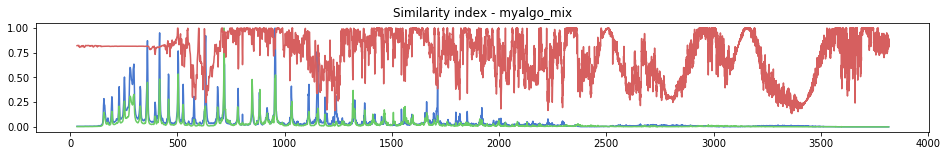


---------------------------------------------------------------

Panning RMS =  0.029049096118197868


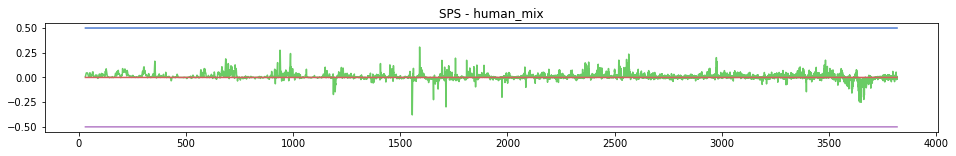


---------------------------------------------------------------

Panning RMS =  0.08301203904204578


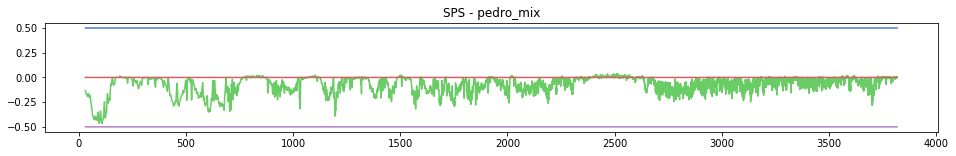


---------------------------------------------------------------

Panning RMS =  0.3861146512392232


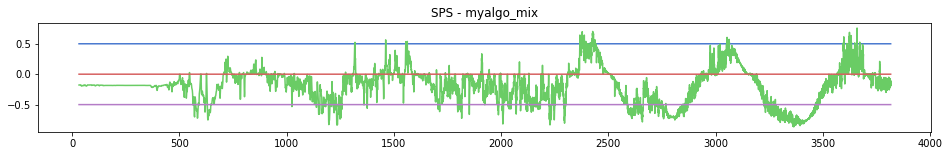

Pan RMS for band: 
500-1k 	0.03271296447502454
Pan RMS for band: 
1k-2k 	0.0398084716023565
Pan RMS for band: 
2k-5k 	0.03600781468450676
Pan RMS for band: 
5k-10k 	0.03965598176423026
Pan RMS for band: 
10-20k 	0.019474010823386352

---------------------------------------------------------------

Pan RMS for band: 
500-1k 	0.16847132834053502
Pan RMS for band: 
1k-2k 	0.09075366854766245
Pan RMS for band: 
2k-5k 	0.1120218053026446
Pan RMS for band: 
5k-10k 	0.13651103192798197
Pan RMS for band: 
10-20k 	0.09109697847205375

---------------------------------------------------------------

Pan RMS for band: 
500-1k 	0.2417783172157657
Pan RMS for band: 
1k-2k 	0.2185482718025524
Pan RMS for band: 
2k-5k 	0.26133530288971873
Pan RMS for band: 
5k-10k 	0.2695080870710223
Pan RMS for band: 
10-20k 	0.3155340827449458

---------------------------------------------------------------

(14846,)

---------------------------------------------------------------

Overall spectral balance =  0.487

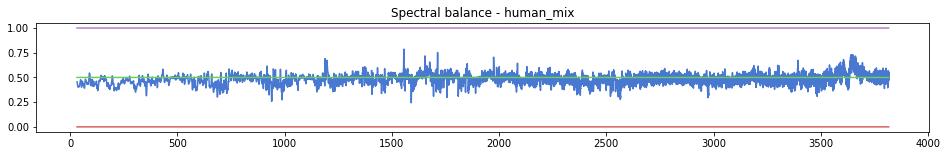


---------------------------------------------------------------

Overall spectral balance =  0.58477783


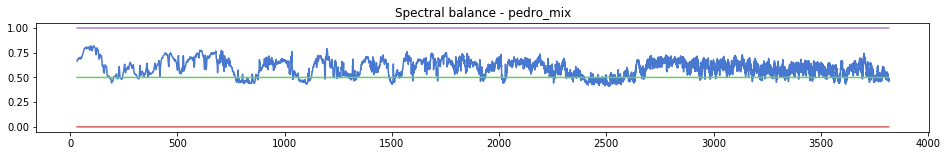


---------------------------------------------------------------

Overall spectral balance =  0.63556194


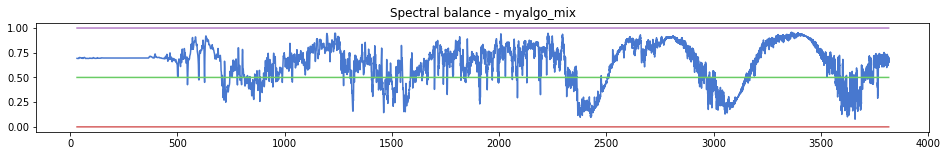

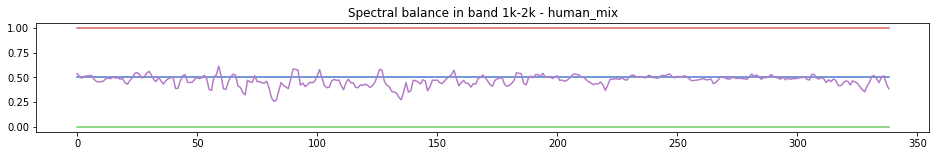

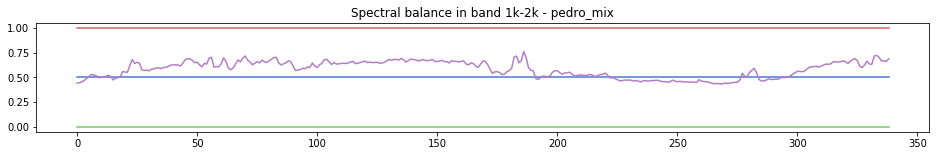

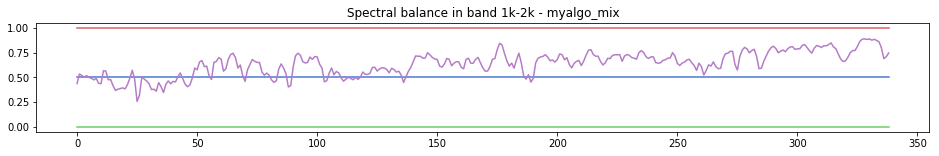


---------------------------------------------------------------

Spectral Balance mean across bands =  [0.4628753, 0.47027317, 0.49165282, 0.48592472, 0.49813262]
Spectral Balance std across bands =  [0.14807165 0.24193944 0.3248604  0.5        0.        ]


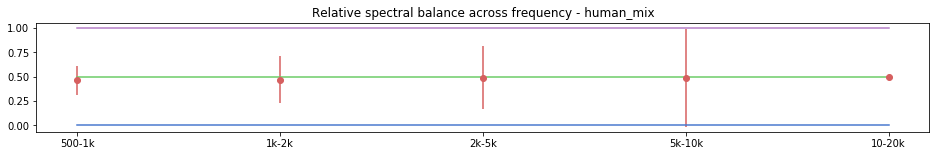


---------------------------------------------------------------

Spectral Balance mean across bands =  [0.6191923, 0.5829387, 0.6056357, 0.6486853, 0.6016066]
Spectral Balance std across bands =  [0.5        0.26005557 0.20455718 0.         0.12078   ]


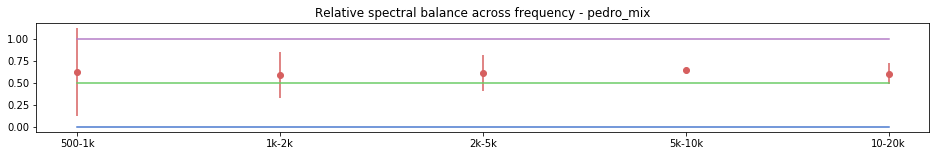


---------------------------------------------------------------

Spectral Balance mean across bands =  [0.6594395, 0.63515645, 0.5815253, 0.68782073, 0.7014392]
Spectral Balance std across bands =  [0.1224298  0.0979762  0.5        0.         0.11407746]


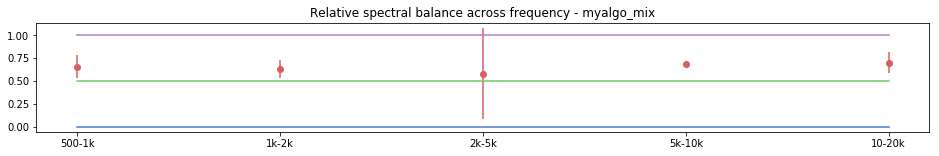

In [252]:
def coh(mx, my):
    return np.multiply(mx,my)
def simfn(s1,s2):
    return 2.0 * np.divide (np.abs(coh(s1,s2)) , np.add(coh(s1,s1),coh(s2,s2)))
def smfn(s1,s2):
    return np.square(s1)-np.square(s2)
def smbfn(s1,s2):
    return np.clip(np.sign(np.square(s1) - np.square(s2)),0,1)
def faxis():
    plt.figure(figsize=(16,0.1))
    plt.plot(freq,freq/2000)
    plt.show()

for i in range(0,len(tracks)):

    sim = simfn(a1[i],a2[i])
    plt.figure(figsize=(16,2))
    plt.title("Similarity index - "+tracks[i])
    print "\n---------------------------------------------------------------\n"
    print 'Overall similarity index = ',np.average(sim)
    plt.plot(xm,a1[i])
    plt.plot(xm,a2[i])
    plt.plot(xm,sim)
#     plt.plot(sim1)
#     plt.plot(sim2)
    plt.show()
    
for i in range(0,len(tracks)):

    sim = simfn(a1[i],a2[i])
    #partial similarity
    sim1 = np.divide(coh(a1[i],a2[i]),coh(a1[i],a1[i]))
    sim2 = np.divide(coh(a1[i],a2[i]),coh(a2[i],a2[i]))
#     sim1, sim2 = sim1/np.max(sim1), sim2/np.max(sim2)

    diff = np.subtract(sim1, sim2) 
    pos = (diff>0).astype(int) * 1
    neg = (diff<0).astype(int) * -1
    delta = np.add(pos, neg)

    sps = np.multiply(np.subtract(np.ones(np.size(sim)),sim),delta)
    pan_rms = np.sqrt(np.mean(sps**2))
    plt.figure(figsize=(16,2))
    plt.title("SPS - "+tracks[i])
    print "\n---------------------------------------------------------------\n"
    print 'Panning RMS = ',pan_rms
    plt.plot(xm,0.5*np.ones(np.size(sps)))
    plt.plot(xm,sps)
    plt.plot(xm,0*np.ones(np.size(sps)))
    plt.plot(xm,-0.5*np.ones(np.size(sps)))
    plt.show()  
    
for i in range(0,len(tracks)):    
    
    fc = [500,1000,2000,5000,10000,20000]
    mels = 2595 * np.log10(1 + np.divide(fc,700))
    bc = np.multiply(mels, float(N)/sr)
    bc = bc.astype(int)
    mel_bands = [np.arange(bc[0],bc[1]),np.arange(bc[1],bc[2]),np.arange(bc[2],bc[3]), np.arange(bc[3],bc[4]),np.arange(bc[4],bc[5])]
    sps_b = [[],[],[],[],[],[]]
    spat_b_mean = [0,1,2,3,4]
    spat_b_var = [0,1,2,3,4]
    spat_b_x = ['500-1k','1k-2k','2k-5k','5k-10k','10-20k']
    

    for j in range(0,5):
        
        sim = simfn(a1[i][mel_bands[j]],a2[i][mel_bands[j]])
        #partial similarity-----------------------for SPS--------------------
        sim1 = np.divide(coh(a1[i][mel_bands[j]],a2[i][mel_bands[j]]),coh(a1[i][mel_bands[j]],a1[i][mel_bands[j]]))
        sim2 = np.divide(coh(a1[i][mel_bands[j]],a2[i][mel_bands[j]]),coh(a2[i][mel_bands[j]],a2[i][mel_bands[j]]))
    #     sim1, sim2 = sim1/np.max(sim1), sim2/np.max(sim2)

        diff = np.subtract(sim1, sim2) 
        pos = (diff>0).astype(int) * 1
        neg = (diff<0).astype(int) * -1
        delta = np.add(pos, neg)
        
        sps_b[j] = np.multiply(np.subtract(np.ones(np.size(sim)),sim),delta)     
        pan_rms = np.sqrt(np.mean(sps_b[j]**2))
        
        print "Pan RMS for band: "
        print spat_b_x[j],'\t',pan_rms
        
        spat_b_mean[j] = np.mean(np.abs(sps_b[j]))
        spat_b_var[j] = np.var(np.abs(sps_b[j]))
    print "\n---------------------------------------------------------------\n"    
    spat_b_var = (spat_b_var-np.min(spat_b_var))
    spat_b_var = spat_b_var/np.max(spat_b_var)/2.
    
    
#     print "SPS mean across bands = ",spat_b_mean 
#     print "SPS std across bands = ",spat_b_var
    
#     plt.figure(figsize=(16,2))
#     plt.title("Relative SPS across frequency - "+tracks[i])
#     print "\n---------------------------------------------------------------\n"
#     print "SPS mean across bands = ",spat_b_mean 
#     print "SPS std across bands = ",spat_b_var
# #     plt.plot(0*np.ones(np.size(spat_b_x)))
# #     plt.plot(0.5*np.ones(np.size(spat_b_x)))
# #     plt.errorbar(spat_b_x, spat_b_mean, spat_b_var, linestyle='None', marker='o')
# #     plt.plot(1*np.ones(np.size(spat_b_x)))
    
#     plt.show()    
    
print np.shape(xm)    
for i in range(0,len(tracks)):  
    spat = np.arctan(np.divide(a1[i],a2[i]))/(np.pi/2)
    plt.figure(figsize=(16,2))
    plt.title("Spectral balance - "+tracks[i])
    print "\n---------------------------------------------------------------\n"
    print 'Overall spectral balance = ',np.average(spat)
    plt.plot(xm,np.abs(spat))
    plt.plot(xm,0.5*np.ones(np.size(spat)))
    plt.plot(xm,0*np.ones(np.size(spat)))
    plt.plot(xm,1*np.ones(np.size(spat)))
    plt.show()
    
    
for i in range(0,len(tracks)):    
    
    fc = [500,1000,2000,5000,10000,20000]
    mels = 2595 * np.log10(1 + np.divide(fc,700))
    bc = np.multiply(mels, float(N)/sr)
    bc = bc.astype(int)
    mel_bands = [np.arange(bc[0],bc[1]),np.arange(bc[1],bc[2]),np.arange(bc[2],bc[3]), np.arange(bc[3],bc[4]),np.arange(bc[4],bc[5])]
    spat_b = [[],[],[],[],[],[]]
    spat_b_avg = [0,1,2,3,4]

    for j in range(0,5):
        spat_b[j] = np.arctan(np.divide(a1[i][mel_bands[j]],a2[i][mel_bands[j]]))/(np.pi/2)
        
    plt.figure(figsize=(16,2))
    plt.title("Spectral balance in band 1k-2k - "+tracks[i])    
    plt.plot(0.5*np.ones(np.size(spat_b[1])))
    plt.plot(0*np.ones(np.size(spat_b[1])))
    plt.plot(1*np.ones(np.size(spat_b[1])))
    plt.plot(spat_b[1])
    plt.show()
    
for i in range(0,len(tracks)):    
    
    fc = [500,1000,2000,5000,10000,20000]
    mels = 2595 * np.log10(1 + np.divide(fc,700))
    bc = np.multiply(mels, float(N)/sr)
    bc = bc.astype(int)
    mel_bands = [np.arange(bc[0],bc[1]),np.arange(bc[1],bc[2]),np.arange(bc[2],bc[3]), np.arange(bc[3],bc[4]),np.arange(bc[4],bc[5])]
    spat_b = [[],[],[],[],[],[]]
    spat_b_mean = [0,1,2,3,4]
    spat_b_var = [0,1,2,3,4]
    spat_b_x = ['500-1k','1k-2k','2k-5k','5k-10k','10-20k']

    for j in range(0,5):
        spat_b[j] = np.arctan(np.divide(a1[i][mel_bands[j]],a2[i][mel_bands[j]]))/(np.pi/2)
        spat_b_mean[j] = np.mean(np.abs(spat_b[j]))
        spat_b_var[j] = np.var(np.abs(spat_b[j]))
        
    spat_b_var = (spat_b_var-np.min(spat_b_var))
    spat_b_var = spat_b_var/np.max(spat_b_var)/2.
    
    plt.figure(figsize=(16,2))
    plt.title("Relative spectral balance across frequency - "+tracks[i])
    print "\n---------------------------------------------------------------\n"
    print "Spectral Balance mean across bands = ",spat_b_mean 
    print "Spectral Balance std across bands = ",spat_b_var
    plt.plot(0*np.ones(np.size(spat_b_x)))
    plt.plot(0.5*np.ones(np.size(spat_b_x)))
    plt.errorbar(spat_b_x, spat_b_mean, spat_b_var, linestyle='None', marker='o')
    plt.plot(1*np.ones(np.size(spat_b_x)))
    
    plt.show()   
    
    
    
       
        

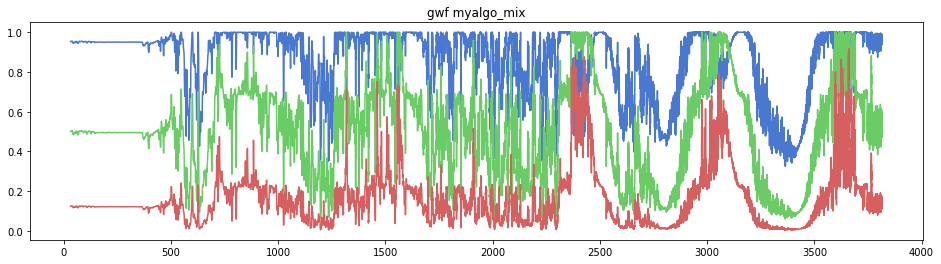

In [253]:
n = N/2 + 1
bins = np.arange(0,n)
v = 0.00
E = 1./3
si_l = 0 #panning index for left
si_c = 0.5  #panning index for center
si_r = 1.0  #panning index for right
gwf_l = v + (1-v) * np.exp(np.multiply((-1/(2*E)), np.square(np.subtract(sps, si_l)) ) )
gwf_c = v + (1-v) * np.exp(np.multiply((-1/(2*E)), np.square(np.subtract(sps, si_c)) ) )
gwf_r = v + (1-v) * np.exp(np.multiply((-1/(2*E)), np.square(np.subtract(sps, si_r)) ) )

plt.figure(figsize=(16,4))
plt.title("gwf "+tracks[2])

plt.plot(xm,gwf_l)
plt.plot(xm,gwf_c)
plt.plot(xm,gwf_r)
plt.show()

In [254]:
print np.multiply(20000, float(N)/sr)

14860.77097505669


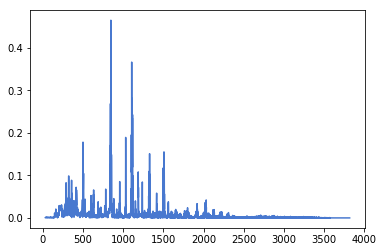

In [255]:
b_20,b_20k = int(20 * float(N)/sr), int(20000 * float(N)/sr)
bins1 = bins[b_20:b_20k]
s = m1[0][b_20:b_20k,0]

freq = np.linspace(20,20000,np.size(bins1))
x_mels = 2595 * np.log10(1 + (freq)/700)

plt.plot(x_mels,s)